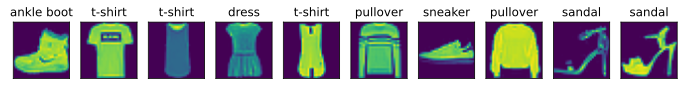

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# ä¸‹é¢ä¸¤ä¸ªå‡½æ•°ç”»å›¾ç›¸å…³
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# å°†æ•°å€¼æ ‡ç­¾ è½¬æ¢ä¸º ç›¸åº”çš„æ–‡æœ¬æ ‡ç­¾
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    use_svg_display()
    # è¿™é‡Œçš„_ è¡¨ç¤ºæˆ‘ä»¬å¿½ç•¥ï¼ˆä¸ä½¿ç”¨ï¼‰çš„å˜é‡
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()


# é¦–å…ˆèŽ·å–æ•°æ®é›†
# transform = transforms.ToTensor()ä½¿æ‰€æœ‰æ•°æ®è½¬æ¢ä¸ºTensorï¼Œå¦‚æžœä¸è¿›è¡Œè½¬æ¢åˆ™è¿”å›žçš„æ˜¯PILå›¾ç‰‡ã€‚
# transforms.ToTensor()å°†å°ºå¯¸ä¸º (H x W x C) ä¸”æ•°æ®ä½äºŽ[0, 255]çš„PILå›¾ç‰‡æˆ–è€…æ•°æ®ç±»åž‹ä¸ºnp.uint8çš„NumPyæ•°ç»„è½¬æ¢ä¸ºå°ºå¯¸ä¸º(C x H x W)
# ä¸”æ•°æ®ç±»åž‹ä¸ºtorch.float32ä¸”ä½äºŽ[0.0, 1.0]çš„Tensor

mnist_train = torchvision.datasets.FashionMNIST(root='/Users/milktime/AnacondaProjects/deeplearning/Datasets/FashionMNIST', \
    train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/Users/milktime/AnacondaProjects/deeplearning/Datasets/FashionMNIST', \
    train=False, download=True, transform=transforms.ToTensor())

# æ˜¾ç¤ºéƒ¨åˆ†æ•°æ®é›†
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [29]:
# è¯»å–å°æ‰¹é‡ æ•°æ®
import torch.utils.data as Data

batch_size = 256
num_workers = 4 # è¿›ç¨‹æ•°è®¾ç½®ä¸º4
# DataLoader çš„ä¸€ä¸ªå¥½å¤„æ˜¯ å¯ä»¥å¤šè¿›ç¨‹è¯»ï¼ŒåŠ å¿«é€Ÿåº¦
train_iter = Data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = Data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True, num_workers=num_workers)


# åˆå§‹åŒ–æ¨¡åž‹å‚æ•°
è·Ÿçº¿æ€§å›žå½’ä¸­çš„ä¾‹å­ä¸€æ ·ï¼Œæˆ‘ä»¬å°†ä½¿ç”¨å‘é‡è¡¨ç¤ºæ¯ä¸ªæ ·æœ¬ã€‚å·²çŸ¥æ¯ä¸ªæ ·æœ¬è¾“å…¥æ˜¯é«˜å’Œå®½å‡ä¸º28åƒç´ çš„å›¾åƒã€‚æ¨¡åž‹çš„è¾“å…¥å‘é‡çš„é•¿åº¦æ˜¯ 28Ã—28=78428Ã—28=784ã€‚<br>ç”±äºŽå›¾åƒæœ‰10ä¸ªç±»åˆ«ï¼Œå•å±‚ç¥žç»ç½‘ç»œè¾“å‡ºå±‚çš„è¾“å‡ºä¸ªæ•°ä¸º10ï¼Œå› æ­¤softmaxå›žå½’çš„æƒé‡å’Œåå·®å‚æ•°åˆ†åˆ«ä¸º784Ã—10å’Œ1Ã—10çš„çŸ©é˜µã€‚

In [30]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float) # shapeåªå¡«ä¸€ä¸ª5ï¼Œè¯´æ˜Žæ˜¯ä¸€çº¬åº¦å‘é‡ï¼ŒåŽç»­å‘é‡åŠ ï¼Œä¼šè‡ªåŠ¨æ‰©å……ä¸ºç›¸åº”çŸ©é˜µ

W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

# å®žçŽ°softmax

In [31]:
# input: éœ€è¦åšsoftmax çš„å¼ é‡
# ret: åšå®Œsoftmax çš„å¼ é‡
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition # è¿™é‡Œç”¨äº†å¹¿æ’­æœºåˆ¶ï¼Œçº¬åº¦ä¸å¤Ÿçš„è‡ªåŠ¨ æ‹·è´

# å®šä¹‰æ¨¡åž‹
æœ‰äº†softmaxè¿ç®—ï¼Œæˆ‘ä»¬å¯ä»¥å®šä¹‰ä¸ŠèŠ‚æè¿°çš„softmaxå›žå½’æ¨¡åž‹äº†ã€‚è¿™é‡Œé€šè¿‡`view`å‡½æ•°å°†æ¯å¼ åŽŸå§‹å›¾åƒæ”¹æˆé•¿åº¦ä¸º`num_inputs`çš„å‘é‡ã€‚<br>
æ³¨æ„ï¼Œæ¨¡åž‹ä¸€æ¬¡æ€§è®¡ç®— ä¸€ä¸ªbatch çš„æ•°æ®

In [32]:
def net(X):
    lin = torch.mm(X.view(-1, num_inputs), W) + b
    return softmax(lin)

# å®šä¹‰æŸå¤±å‡½æ•°
å€ŸåŠ© gatherï¼Œç­›é€‰å‡ºæ¯ä¸ªæ ·æœ¬è¾“å‡ºä¸­ï¼Œå¯¹åº”ç±»åˆ«çš„æ¦‚çŽ‡

In [33]:
def cross_entropy(y_hat, y):
    y_hat_choose = y_hat.gather(1, y.view(-1, 1)) 
    return - torch.log(y_hat_choose)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# è¯„ä¼°åˆ†ç±»å‡†ç¡®çŽ‡
å€ŸåŠ© argmax(dim=1) å‡½æ•°ï¼Œè¿”å›žç¬¬1çº¬ä¸Šï¼Œæœ€å¤§æ•°å€¼çš„ç´¢å¼•

In [34]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

# è¯„ä¼° ç½‘ç»œæ¨¡åž‹ net ä¸Šï¼Œæµ‹è¯•é›†çš„å‡†ç¡®çŽ‡
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += accuracy(net(X), y)
        n += 1
    return acc_sum / n


# å®žçŽ°æ¢¯åº¦ä¸‹é™ä¼˜åŒ–å‡½æ•°

In [35]:
# å®šä¹‰ä¼˜åŒ–ç®—æ³•ï¼Œå°æ‰¹é‡éšæœºæ¢¯åº¦ä¸‹é™ç®—æ³• ä¼˜åŒ–æ¯ä¸€ä¸ªæƒé‡
def sgd(params, lr, batch_size):
    for param in params:
        # æ³¨æ„è¿™é‡Œç”¨çš„æ˜¯ param.dataï¼Œé¿å…å¹²æ‰°è‡ªåŠ¨è®¡ç®—çš„æ¢¯åº¦
        param.data -= lr * param.grad / batch_size

# è®­ç»ƒæ¨¡åž‹

epoch 1, loss 0.4657, train acc 0.843, test acc 0.835
epoch 2, loss 0.4585, train acc 0.844, test acc 0.830
epoch 3, loss 0.4525, train acc 0.847, test acc 0.830
epoch 4, loss 0.4483, train acc 0.848, test acc 0.819
epoch 5, loss 0.4435, train acc 0.848, test acc 0.837


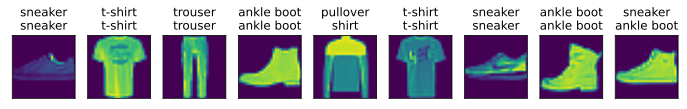

In [38]:
num_epochs, lr = 5, 0.1
loss = cross_entropy

for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y).sum()
        


        l.backward()        # å¯¹å‚æ•°æ±‚æ¢¯åº¦
        sgd((W, b), lr, batch_size) # æ¢¯åº¦ä¸‹é™ä¼˜åŒ–

        #æ¢¯åº¦æ¸…é›¶ æ”¾åœ¨ä¸‹ä¸€æ¬¡å¼€å§‹ä¹‹å‰
        W.grad.data.zero_()
        b.grad.data.zero_()

        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]

    test_acc = evaluate_accuracy(test_iter, net)
    print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        

# ç”»å›¾ çœ‹ä¸€ç»„é¢„æµ‹ç»“æžœ
X, y = iter(test_iter).next()
true_labels = get_fashion_mnist_labels(y)
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1))
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
show_fashion_mnist(X[0:9], titles[0:9])